In [1]:
import utils as fx
from numpy import mean
import pickle

subj = 'Phoebe_210620' #name of our dataset
num_samples_per_state = 100 # demo dataset has up to 288 samples per each state
segment_length = 250 # 0.25 sec windows for our demo dataset
n_epochs = 10

imgs = [10,20]
err_percentages = [0.05, 0.1]

## No artifact
The following code will run through different imgs sizes and err_percentages. 
Obviously, in the "no artifact" case, the data won't include any type of artifacts.

In [2]:
import pickle

# Load res_noartifact from disk if it exists
try:
    with open('res_noartifact.pkl', 'rb') as f:
        res_noartifact = pickle.load(f)
except FileNotFoundError:
    res_noartifact = {}  # Initialize an empty dictionary if file not found

for err in err_percentages:
    for img_size in imgs:
        if (err, img_size) in res_noartifact:
            print('skipped!', err, img_size)
            continue

        temp_test_acc = []
        temp_cm_normalized = []
        
        n = 2 # Change this to n runs
        for _ in range(n):  
            test_acc, cm_normalized = fx.pipeline_noartifact(subj, num_samples_per_state, img_size, segment_length, err, n_epochs)
            temp_test_acc.append(test_acc)
            temp_cm_normalized.append(cm_normalized)

        # average values after n runs
        avg_test_acc = mean(temp_test_acc)
        avg_cm_normalized = mean(temp_cm_normalized, axis=0)

        # Save the averaged results in the dictionary
        res_noartifact[(err, img_size)] = {'test_acc': avg_test_acc, 'cm_normalized': avg_cm_normalized}

        # Save to disk after every iteration
        with open('res_noartifact.pkl', 'wb') as f:
            pickle.dump(res_noartifact, f)


skipped! 0.05 10
skipped! 0.05 20
skipped! 0.1 10
skipped! 0.1 20


In [3]:
res_noartifact

{(0.05, 10): {'test_acc': 0.6100932359695435,
  'cm_normalized': array([[0.46335583, 0.2283028 , 0.30834137],
         [0.30086789, 0.63741562, 0.06171649],
         [0.24132112, 0.02917068, 0.7295082 ]])},
 (0.05, 20): {'test_acc': 0.7149630486965179,
  'cm_normalized': array([[0.50024108, 0.16538091, 0.33437801],
         [0.25699132, 0.73963356, 0.00337512],
         [0.08992285, 0.00506268, 0.90501446]])},
 (0.1, 10): {'test_acc': 0.5948248207569122,
  'cm_normalized': array([[0.47420444, 0.18201543, 0.34378014],
         [0.39585342, 0.55135005, 0.05279653],
         [0.22275796, 0.01832208, 0.75891996]])},
 (0.1, 20): {'test_acc': 0.7127932906150818,
  'cm_normalized': array([[6.34281581e-01, 1.43924783e-01, 2.21793635e-01],
         [2.68804243e-01, 7.30713597e-01, 4.82160077e-04],
         [2.23722276e-01, 2.89296046e-03, 7.73384764e-01]])}}

## Hopfield + CNN model
The total number of stored patterns is directly related to the numer of neurons. The number of neurons is the total size of the image 

$n\_neurons = img\_size * image\_size$

Then, 


$max\_patterns = int(0.138 * n\_neurons)$

In [4]:
import pickle

try:
    with open('results_hop.pkl', 'rb') as f:
        results_2hop = pickle.load(f)
except FileNotFoundError:
    results_2hop = {}  # Initialize an empty dictionary if file not found

for err in err_percentages:
    for img_size in imgs:
        
        # Skip computation if this combination already exists
        if (err, img_size) in results_2hop:
            print('skipped!', err, img_size)
            continue

        temp_test_acc = []
        temp_cm_normalized = []

        for _ in range(2):  # Change this to 5 if you meant 5 runs
            test_acc, cm_normalized = fx.pipeline_hopfield_rec(subj, num_samples_per_state, img_size, segment_length, err, n_epochs)
            temp_test_acc.append(test_acc)
            temp_cm_normalized.append(cm_normalized)

        avg_test_acc = mean(temp_test_acc)
        avg_cm_normalized = mean(temp_cm_normalized, axis=0)

        # Save the averaged results in the dictionary
        results_2hop[(err, img_size)] = {'test_acc': avg_test_acc, 'cm_normalized': avg_cm_normalized}

        # Save to disk after every iteration
        with open('results_hop.pkl', 'wb') as f:
            pickle.dump(results_2hop, f)

skipped! 0.05 10
skipped! 0.05 20
skipped! 0.1 10
skipped! 0.1 20


## Baseline
without treatment for artifacts. 

In [5]:
import pickle

# Load results from disk if it exists
try:
    with open('results.pkl', 'rb') as f:
        results = pickle.load(f)
except FileNotFoundError:
    results = {}  # Initialize an empty dictionary if file not found

for err in err_percentages:
    for img_size in imgs:

        # Skip computation if this combination already exists
        if (err, img_size) in results:
            print('skipped!', err, img_size)
            continue

        temp_test_acc = []  
        temp_cm_normalized = [] 

        n = 2 # number of runs
        for _ in range(n): 
            test_acc, cm_normalized = fx.pipeline(subj, num_samples_per_state, img_size, segment_length, err, n_epochs)
            temp_test_acc.append(test_acc)
            temp_cm_normalized.append(cm_normalized)

        avg_test_acc = mean(temp_test_acc)
        avg_cm_normalized = mean(temp_cm_normalized, axis=0)

        results[(err, img_size)] = {'test_acc': avg_test_acc, 'cm_normalized': avg_cm_normalized}

        with open('results.pkl', 'wb') as f:
            pickle.dump(results, f)

skipped! 0.05 10
skipped! 0.05 20
skipped! 0.1 10
skipped! 0.1 20


## plotting 

In [6]:
import numpy as np
import pickle

with open('res_noartifact.pkl', 'rb') as f:
    res_noartifact = pickle.load(f)

with open('results.pkl', 'rb') as f:
    results = pickle.load(f)

with open('results_hop.pkl', 'rb') as f:
    results_2hop_v2 = pickle.load(f)

default_value = {'test_acc': -0, 'cm_normalized': np.array([[-0, -0, -1], [-1, -1, -1], [-1, -1, -1]]), 'cm_m': -0}

datasets = [results, results_2hop_v2, res_noartifact]

# Loop through each dataset to populate missing (err, img) combinations
for dataset in datasets:
    for img in imgs:
        for err in err_percentages:
            if (err, img) not in dataset:
                dataset[(err, img)] = default_value  # Using default_value with 'cm_m'
            else:
                cm_normalized = dataset[(err, img)]['cm_normalized']
                cm_m = np.mean(np.diag(cm_normalized))
                dataset[(err, img)]['cm_m'] = cm_m  # Storing the mean of the diagonal

In [7]:
# Initialize a dictionary to hold merged results
merged_results = {}

# List of datasets to be merged

datasets = [results,results_2hop_v2,res_noartifact]
colors = ['g', 'b', 'r']
dataset_names = ['Baseline', 'Hopfield-rec', 'No-artifacts']

# Iterate through each dataset to populate merged_results
for data, name in zip(datasets, dataset_names):
    for key, value in data.items():
        if key not in merged_results:
            merged_results[key] = {}
        
        # Assume that 'test_acc' is what you want to merge; extend for other metrics
        merged_results[key][f'test_acc_{name}'] = value['test_acc']

# Now, merged_results contains combined test accuracy from all datasets, separated by dataset name.


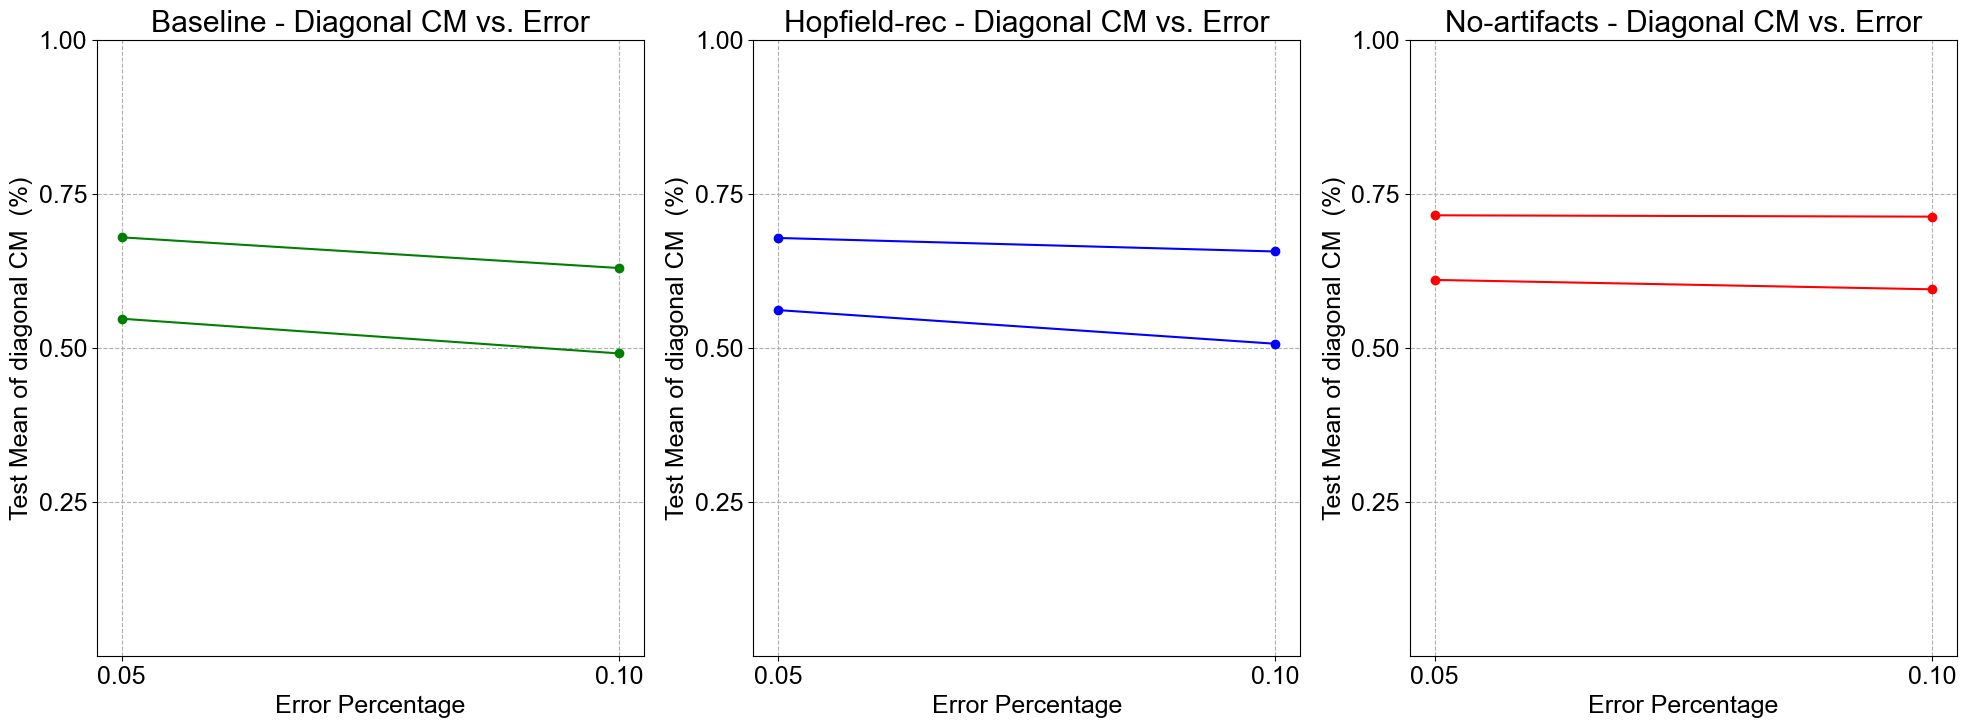

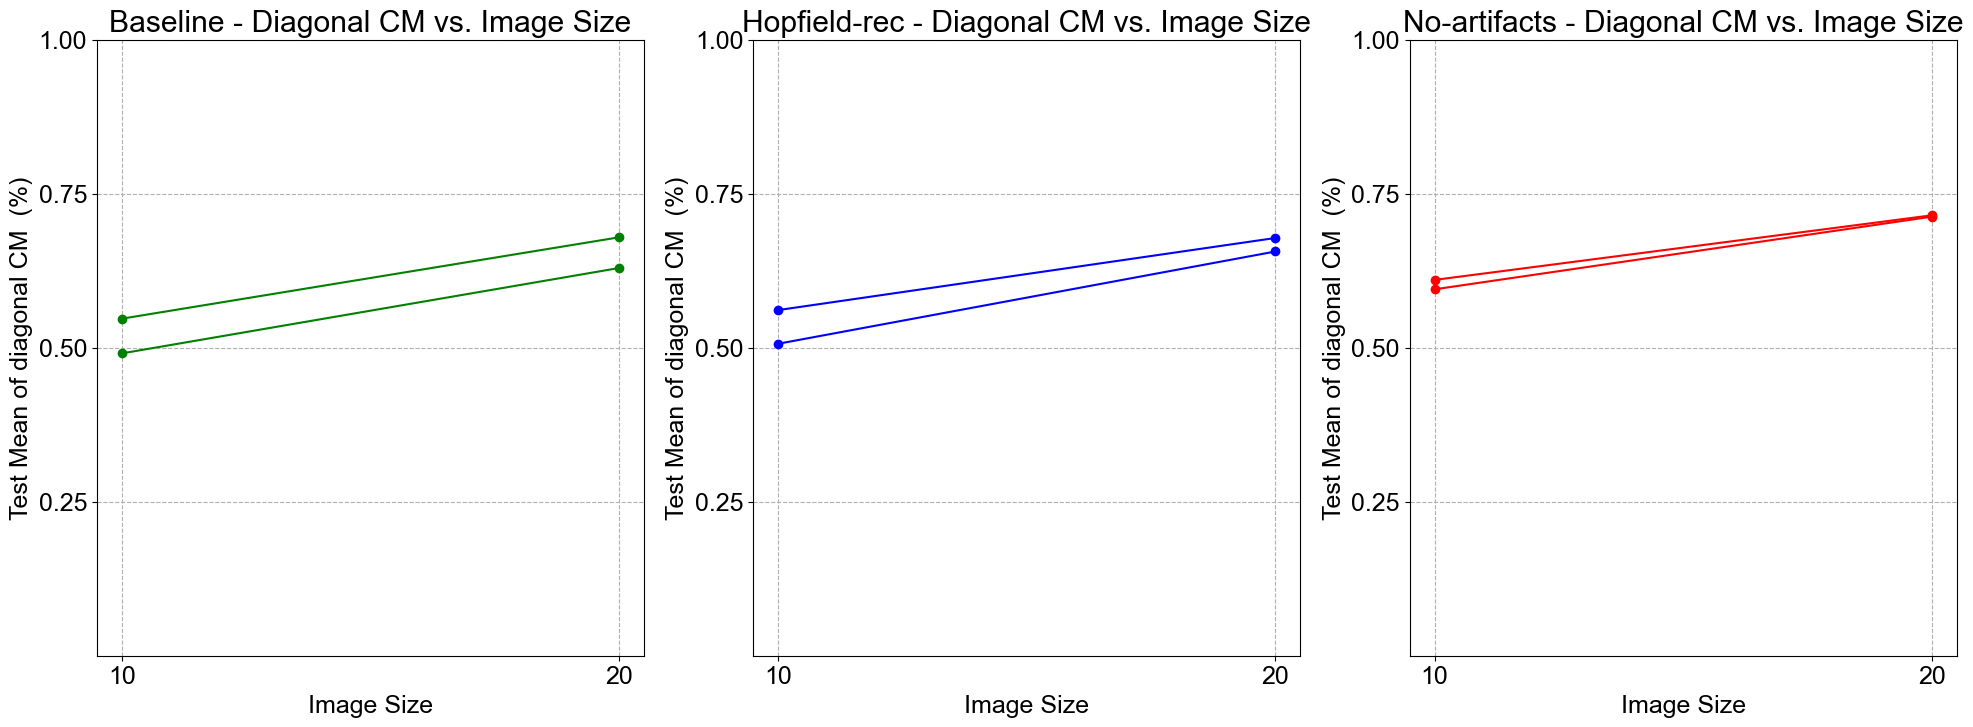

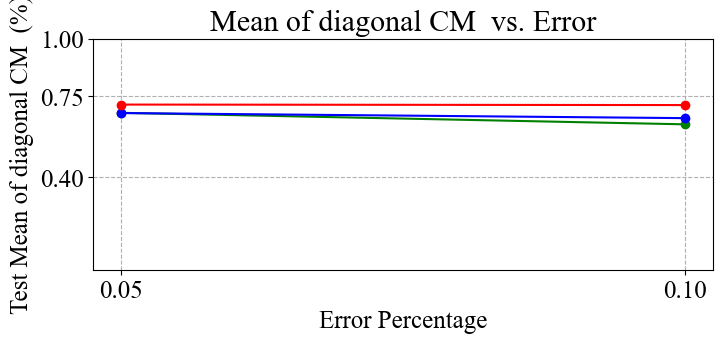

In [8]:
import numpy as np
import pickle

with open('res_noartifact.pkl', 'rb') as f:
    res_noartifact = pickle.load(f)

with open('results.pkl', 'rb') as f:
    results = pickle.load(f)

with open('results_hop.pkl', 'rb') as f:
    results_2hop_v2 = pickle.load(f)

imgs = [10, 20]
err_percentages = err_percentages

default_value = {'test_acc': -0, 'cm_normalized': np.array([[-0, -0, -1], [-1, -1, -1], [-1, -1, -1]]), 'cm_m': -0}

datasets = [results, results_2hop_v2, res_noartifact]

# Loop through each dataset to populate missing (err, img) combinations
for dataset in datasets:
    for img in imgs:
        for err in err_percentages:
            if (err, img) not in dataset:
                dataset[(err, img)] = default_value  # Using default_value with 'cm_m'
            cm_normalized = dataset[(err, img)]['cm_normalized']
            cm_m = np.mean(np.diag(cm_normalized))
            dataset[(err, img)]['cm_m'] = cm_m  # Storing the mean of the diagonal

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Setting plot aesthetics
font = {'family': 'Arial', 'weight': 'normal', 'size': 18}
plt.rc('font', **font)
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

datasets = [results,results_2hop_v2,res_noartifact]
colors = ['g', 'b', 'r']
titles = ['Baseline', 'Hopfield-rec', 'No-artifacts']

datasets = [results,results_2hop_v2,res_noartifact]
colors = ['g', 'b', 'r']
dataset_names = ['Baseline', 'Hopfield-rec', 'No-artifacts']

for idx, (data, color, title) in enumerate(zip(datasets, colors, titles)):

    ax = axes[idx]
    for img_size in [10, 20]:
        acc_values = [data[(err, img_size)]['cm_m'] for err in err_percentages if (err, img_size) in data]

        ax.plot(err_percentages, acc_values, marker='o', label=f"Image Size {img_size}", color=color)
    
    ax.set_xticks(err_percentages)
    ax.set_yticks([0.25, 0.50, 0.75, 1])
    ax.set_ylim([0, 1])
    ax.set_title(f"{title} - Diagonal CM vs. Error")
    ax.set_xlabel('Error Percentage')
    ax.set_ylabel('Test Mean of diagonal CM  (%)')
    ax.grid(True, linestyle='--')

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for idx, (data, color, title) in enumerate(zip(datasets, colors, titles)):
    ax = axes[idx]
    for err in err_percentages:
        acc_values = [data[(err, img_size)]['cm_m'] for img_size in imgs]
        ax.plot(imgs, acc_values, marker='o', label=f"Error {err}", color=color)

    ax.set_xticks(imgs)
    ax.set_yticks([0.25, 0.50, 0.75, 1])
    ax.set_ylim([0, 1])
    ax.set_title(f"{title} - Diagonal CM vs. Image Size")
    ax.set_xlabel('Image Size')
    ax.set_ylabel('Test Mean of diagonal CM  (%)')
    ax.grid(True, linestyle='--')


merged_results = {}

datasets = [results_2hop, res_noartifact, results]
dataset_names = ['Hopfield-rec', 'No-artifacts', 'Baseline']

# Iterate through each dataset to populate merged_results
#for data, name in zip(datasets, dataset_names):
#    for key, value in data.items():
#        if key not in merged_results:
#            merged_results[key] = {}
#       merged_results[key][f'test_acc_{name}'] = value['cm_m']

font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 18}
plt.rc('font', **font)


fig, ax = plt.subplots(figsize=(8, 3))

datasets = [results,results_2hop_v2,res_noartifact]
colors = ['g', 'b', 'r']
titles = ['Baseline', 'Hopfield-rec', 'No-artifacts']
datasets = [results,results_2hop_v2,res_noartifact]
colors = ['g', 'b', 'r']
dataset_names = ['Baseline', 'Hopfield-rec', 'No-artifacts']


for idx, (data, color, title) in enumerate(zip(datasets, colors, titles)):
    for img_size in [20]:
        acc_values = [data[(err, img_size)]['cm_m'] for err in err_percentages if (err, img_size) in data]
        ax.plot(err_percentages, acc_values, marker='o', color=color)

ax.set_xticks(err_percentages)
ax.set_yticks([0.4, 0.75, 1])
ax.set_ylim([0, 1])
ax.set_title('Mean of diagonal CM  vs. Error')
ax.set_xlabel('Error Percentage')
ax.set_ylabel('Test Mean of diagonal CM  (%)')
ax.grid(True, linestyle='--')
'''
fig, ax = plt.subplots(figsize=(4, 2))


for idx, (data, color, title) in enumerate(zip(datasets, colors, titles)):
    for err in err_percentages:
        acc_values = [data[(err, img_size)]['cm_m'] for img_size in imgs if (err, img_size) in data]
        ax.plot(imgs, acc_values, marker='o', color=color)

ax.set_xticks(imgs)
ax.set_yticks([0.25, 0.50, 0.75, 1])
ax.set_ylim([0, 1])
ax.set_title('Mean of diagonal CM vs. Image Size')
ax.set_xlabel('Image Size')
ax.set_ylabel('Test Accuracy (%)')
ax.grid(True, linestyle='--')
plt.show()
'''

print()